# Separability and Hidden Layers: Extras

There is another way we can think about what a model is doing at the hidden layer. We can think of each unit of the hidden layer as making it's own decision, and these decisions are combined at the output of the model as if each hidden unit had a vote in determining the final output.

Using TensorFlow backend.


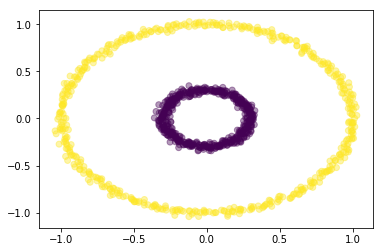

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs, make_circles
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
    
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks,
                         yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ[:,0] >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)
    
X, y = make_circles(n_samples=1000, noise=0.02, factor=0.3)
y = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)

- - -
### Exercise 1 - hidden layer decision boundaries

If we use ReLU activation in our hidden layer, we can look at units in that layer and consider the part of the input space where the unit is "on" (has some positive value) or "off" (is 0).

Train a model with a ReLU hidden layer and create a truncated model to extract the hidden layer activations. We will use this below to inspect the hidden units.
- - -

In [ ]:
# Build a model with a ReLU hidden layer and softmax output. Fit the model to the circle data.
model0 = Sequential()

In [ ]:
# Use the plot_decision_boundary function to see what the network learned
plot_decision_boundary(model0, X, y)

In [ ]:
# Show layers in the model
model0.layers

Check that `layer_to_extract` below matches the hidden layer activation (after the activation function).

In [ ]:
from keras import backend as K

layer_to_extract = 1
get_hidden_layer_output = K.function([model0.layers[0].input],
                                     [model0.layers[layer_to_extract].output])
H = get_hidden_layer_output([X_test])[0]

print H.shape

Below we define a new function to help us see what hidden units are doing. This function plots the decision boundary for multiple hidden units at once. You can provide a list of hidden unit indices as the last argument to the function.

In [ ]:
def plot_hidden_decision_boundary(get_output_fn, X, y, hidden_units=[0]):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    
    alpha = 0.2 / len(hidden_units)
    
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)
    
    for i in hidden_units:
        # Find outputs where the specified hidden_unit is "on"
        ZZ = get_output_fn([np.c_[xx.ravel(), yy.ravel()]])[0]
        Z = ZZ[:,i] > 0.0
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=alpha)
        fig.hold(True)

Look at the decision boundary of some of the units by using different indices. How do they compare with the decision boundary of the whole model you plotted above?

In [ ]:
plot_hidden_decision_boundary(get_hidden_layer_output, X, y, [0])

Now try visualizing multiple units at the same time. Notice how there are areas of the input where different units agree and areas where they disagree. Each hidden unit, in a way, has its own idea about how to classify the input. These decisions are not simply added up - they go through more weights and a softmax activation, so they build up the final output in a more complicated way than just adding up. But you should have an intuition about what role the hidden units play in that output.